<center><h1  style="color:white; background-color:#000000; border-radius: 0px; padding:25px;"> Rules extraction </h1></center>

This notebook illustrates rules extraction from decision trees.

In [1]:

import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import time

import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, accuracy_score,roc_auc_score

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from pysirus.models.extractors import SirusDTreeClassifier,SirusRFClassifier,SirusGBClassifier

In [4]:
np.zeros((1,2))

array([[0., 0.]])

In [5]:
from sklearn import tree

## Load data :

In [6]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Single tree : 

In [9]:
# Usual DecisionTree
clf_dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
clf_dtree.fit(X_train, y_train)
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_proba_dtree = clf_dtree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

PR AUC : 0.9546052631578946
ROC AUC : 0.980263157894737
Accuracy : 0.9736842105263158


In [10]:
## DecisionTree rules extraction
STree = SirusDTreeClassifier(max_depth=2, random_state=0)
STree.fit(X_train,y_train,quantile=10)
y_pred_sirus = STree.predict(X_test)
y_pred_proba_sirus = STree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))

PR AUC : 0.9163432355967078
ROC AUC : 0.9802631578947368
Accuracy : 0.9473684210526315


In [11]:
STree.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
STree.print_rules(max_rules=3)

########
Rules 0 
       &( petal length <= 4.8999998569488525 )
########
Rules 1 
       &( petal width <= 0.7699999958276749 )
########
Rules 2 
       &( petal width > 0.7699999958276749 )
       &( petal length <= 4.8999998569488525 )


In [12]:
STree.show_rules(max_rules=16)

Estimated average rate for target class 1 (from 'else' clauses) p_s = 19%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                                     THEN P(C1)      ELSE P(C1)
---------------------------------------------------------------------------
if   petal length <= 4.90                   then 44%          else 7%          
if   petal width <= 0.77                    then 0%           else 45%         
if   petal width > 0.77 & petal length <= 4.90 then 94%          else 4%          


In [13]:
STree.n_features_in_

4

## Random forest : 

In [14]:
# Usual RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_dtree = clf_rf.predict(X_test)
y_pred_proba_dtree = clf_rf.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

PR AUC : 0.9780937683715462
ROC AUC : 0.996191135734072
Accuracy : 0.9736842105263158


In [25]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(max_depth=2, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X_train,y_train,quantile=10,batch_size_post_treatment=50,p0=0.01)
end = time.time()
y_pred_sirus = RFSirus.predict(X_test,to_add_probas_outside_rules=True)
y_pred_proba_sirus = RFSirus.predict_proba(X_test,to_add_probas_outside_rules=True)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.9786189784555798
ROC AUC : 0.9844182825484765
Accuracy : 0.9210526315789473
Fitting time =  0.06607747077941895 s


In [16]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(max_depth=2, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X_train,y_train,quantile=10,batch_size_post_treatment=50,p0=0.01)
end = time.time()
y_pred_sirus = RFSirus.predict(X_test,to_add_probas_outside_rules=False)
y_pred_proba_sirus = RFSirus.predict_proba(X_test,to_add_probas_outside_rules=False)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.9628614720730734
ROC AUC : 0.9594875346260389
Accuracy : 0.9210526315789473
Fitting time =  0.06518721580505371 s


In [17]:
y_pred_proba_sirus

array([[0.28675144, 0.35723585, 0.35601271],
       [0.30915793, 0.52813239, 0.16270968],
       [0.64855037, 0.2914098 , 0.06003983],
       [0.04210526, 0.37954576, 0.57834897],
       [0.66980515, 0.27293939, 0.05725546],
       [0.21264368, 0.21892542, 0.5684309 ],
       [0.66980515, 0.27293939, 0.05725546],
       [0.33549313, 0.60088597, 0.0636209 ],
       [0.25768306, 0.5785777 , 0.16373924],
       [0.33419137, 0.51623975, 0.14956889],
       [0.28759852, 0.53707458, 0.17532691],
       [0.38047987, 0.53907141, 0.08044872],
       [0.30903418, 0.52646167, 0.16450415],
       [0.30996387, 0.5354571 , 0.15457903],
       [0.30903418, 0.52646167, 0.16450415],
       [0.66980515, 0.27293939, 0.05725546],
       [0.33419137, 0.51623975, 0.14956889],
       [0.39771115, 0.47015457, 0.13213428],
       [0.62232139, 0.28908333, 0.08859528],
       [0.64855037, 0.2914098 , 0.06003983],
       [0.31443259, 0.36928194, 0.31628548],
       [0.39322645, 0.49001168, 0.11676187],
       [0.

In [18]:
y_pred_proba_sirus.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [19]:
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']

In [26]:
RFSirus.show_rules(max_rules=10)

Estimated average rate for target class 1 (from 'else' clauses) p_s = 21%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                                  THEN P(C1)      ELSE P(C1)
------------------------------------------------------------------------
if   Feature[3] <= 0.40                  then 0%           else 44%         
if   Feature[3] <= 1.50                  then 43%          else 9%          
if   Feature[2] <= 4.70                  then 42%          else 13%         
if   Feature[2] <= 1.63                  then 0%           else 44%         
if   Feature[3] <= 1.80                  then 45%          else 3%          
if   Feature[2] > 1.63 & Feature[3] > 1.50 then 9%           else 43%         
if   Feature[2] > 1.63 & Feature[3] <= 1.50 then 86%          else 5%          
if   Feature[0] <= 5.60                  then 16%          else 39%         
if   Feature[0] <= 6.16                  then 34%          else 24%         
if   Feature[

In [21]:
from pysirus.models.optimizer import train_optimal_extractor_p0
from sklearn.metrics import roc_auc_score

In [22]:
def my_roc(y_true,y_pred_probas):
    return roc_auc_score(y_true, y_pred_probas,average='micro',multi_class='ovr')
    

In [24]:
final_sirus_model = train_optimal_extractor_p0(clf=RFSirus,X_train=X,y_train=y,quantile=20,
                           scoring=my_roc,scoring_on_probas=True,p0_exploration_grid=np.linspace(0.01, 0.05, 15),
                           n_cv_splits=5,n_cv_repeats=1)


--- Suggested p0 Range for 1-25 Rules ---
Based on this exploration, p0 values between roughly 0.01000 and 0.05000 produced 1-25 rules.
Consider using a grid like this for your detailed tuning:
p0_grid = np.linspace(0.01000, 0.05000, 20)

Raw suggested grid values:
[0.01       0.01210526 0.01421053 0.01631579 0.01842105 0.02052632
 0.02263158 0.02473684 0.02684211 0.02894737 0.03105263 0.03315789
 0.03526316 0.03736842 0.03947368 0.04157895 0.04368421 0.04578947
 0.04789474 0.05      ]
Starting p0 tuning with 1 repetitions of 5-fold CV...
  Tuning for p0 = 0.0100...
    Repetition 1/1
14 found.
16 found.
16 found.
15 found.
14 found.
  p0 = 0.0100: Mean(1-AUC)=0.0179, Std(Means 1-AUC)=0.0000, Mean_N_Rules=15.00
  Tuning for p0 = 0.0121...
    Repetition 1/1
14 found.
16 found.
16 found.
15 found.
14 found.
  p0 = 0.0121: Mean(1-AUC)=0.0179, Std(Means 1-AUC)=0.0000, Mean_N_Rules=15.00
  Tuning for p0 = 0.0142...
    Repetition 1/1
14 found.
16 found.
16 found.
15 found.
14 found.
  p0 

## GB :

In [27]:
# Usual GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100,max_depth=2,random_state=19)
start = time.time()
GB.fit(X_train, y_train)
end = time.time()
y_pred_dtree = GB.predict(X_test)
y_pred_proba_dtree = GB.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.9780937683715463
ROC AUC : 0.996191135734072
Accuracy : 0.9736842105263158
Fitting time =  0.12485337257385254 s


In [28]:
# GradientBoostingClassifier rules extraction
GBSirus = SirusGBClassifier(n_estimators=100,max_depth=2, random_state=19,splitter="quantile")
start = time.time()
GBSirus.fit(X_train, y_train,p0=0.05,quantile=20)
end = time.time()
y_pred_dtree = GBSirus.predict(X_test,to_add_probas_outside_rules=True)
y_pred_proba_dtree = GBSirus.predict_proba(X_test,to_add_probas_outside_rules=True)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.9735729901528513
ROC AUC : 0.9439058171745152
Accuracy : 0.8157894736842105
Fitting time =  0.12318277359008789 s


In [37]:
# GradientBoostingClassifier rules extraction
GBSirus = SirusGBClassifier(n_estimators=100,max_depth=2, random_state=19,splitter="quantile")
start = time.time()
GBSirus.fit(X_train, y_train,p0=0.01,quantile=20)
end = time.time()
y_pred_gbsirus = GBSirus.predict(X_test,to_add_probas_outside_rules=False)
y_pred_proba_gbsirus = GBSirus.predict_proba(X_test,to_add_probas_outside_rules=False)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_gbsirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_gbsirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_gbsirus))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.8524733364664995
ROC AUC : 0.9248614958448753
Accuracy : 0.7894736842105263
Fitting time =  0.12149786949157715 s


In [29]:
GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
GBSirus.show_rules(max_rules=16)

Estimated average rate for target class 1 (from 'else' clauses) p_s = 27%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                                    THEN P(C1)      ELSE P(C1)
--------------------------------------------------------------------------
if   sepal width <= 2.70                   then 59%          else 21%         
if   petal width <= 1.14                   then 18%          else 39%         
if   petal width <= 1.14 & sepal width > 2.70 then 0%           else 45%         
if   petal length <= 1.50                  then 0%           else 40%         
if   sepal width <= 3.10                   then 47%          else 12%         
if   petal length <= 4.70                  then 42%          else 13%         
if   petal length <= 5.48                  then 38%          else 0%          
if   petal width <= 1.50                   then 43%          else 9%          
if   petal width <= 0.20                   then 0%           else 40%   

In [23]:
GBSirus.print_rules(max_rules=10)

########
Rules 0 
       &( sepal width <= 2.700000047683716 )
########
Rules 1 
       &( petal width <= 1.1399999856948853 )
########
Rules 2 
       &( petal width <= 1.1399999856948853 )
       &( sepal width > 2.700000047683716 )
########
Rules 3 
       &( petal length <= 1.5 )
########
Rules 4 
       &( sepal width <= 3.0999999046325684 )
########
Rules 5 
       &( petal length <= 4.699999809265137 )
########
Rules 6 
       &( petal length <= 5.480000019073486 )
########
Rules 7 
       &( petal width <= 1.5 )
########
Rules 8 
       &( petal width <= 0.20000000298023224 )
########
Rules 9 
       &( petal length <= 3.9000000953674316 )


# Tests : 

## Essais :

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
y[y==1] = -1
y[y==2] = -1
y[y==0] = 1
y[y==-1]=0
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y.sum()

50

## Essais 2:

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  6
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')], [(2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R')]]
####################
25 proportions_count_sort :  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
####################
**********************************************************************
Compared ruled paths_left:  [(2, 1.7000000476837158, 'L')]
Paths:  [(2, 1.7000000476837158, 'L')]
Path ftr:  []
**********************************************************************
Compared ruled pa

[Text(0.4, 0.8333333333333334, 'x[2] <= 1.7\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.4\ngini = 0.038\nsamples = 102\nvalue = [100, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]')]

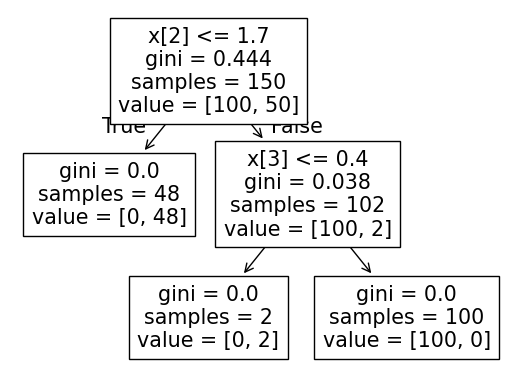

In [20]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])

In [26]:
def implies(single_rule_a,single_rule_b):
        """""
        Check if single_rule_a implies single_rule_b.
        Args:
            single_rule_a (tuple): First single rule in the form (var, thr, dir).
            single_rule_b (tuple): Second single rule in the form (var, thr, dir).
        """""
        if single_rule_a[0] == single_rule_b[0]:
            if single_rule_a[2] == 'L':
                if single_rule_b[2] == 'L':
                    return single_rule_a[1] <= single_rule_b[1]
                else:
                    return False
            else:
                if single_rule_b[2] == 'R':
                    return single_rule_a[1] >= single_rule_b[1]
                else:
                    return False
        else:
            return False

In [27]:
implies(single_rule_a=(2, 1.7000000476837158, 'L'),single_rule_b=(2, 1.7000000476837158, 'L'))

True

In [28]:
implies(single_rule_a=(2, 1.7000000476837158, 'L'),single_rule_b=(3, 0.4000000059604645, 'L'))

False

In [38]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=True, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  30
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'R')], [(2, 1.7000000476837158, 'L')], [(3, 0.4000000059604645, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'R')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'R')], [(0, 4.800000190734863, 'L')], [(0, 4.800000190734863, 'R')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'L')], [(3, 0.20000000298023224, 'R')], [(3, 0.20000000298023224, 'L')], [(2, 1.7000000476837158, 'R'), (3, 

## RF : 

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=False, random_state=1,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

In [ ]:
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

In [ ]:
tree.plot_tree(RFSirus.estimators_[0])

In [ ]:
tree.plot_tree(RFSirus.estimators_[800])

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,batch_size_post_treatment=50,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])
tree.plot_tree(RFSirus.estimators_[0])

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])

In [ ]:
## RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19)
start = time.time()
RF.fit(X,y)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
tree.plot_tree(RF.estimators_[0])

In [ ]:
## RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=0)
start = time.time()
RF.fit(X,y)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
tree.plot_tree(RF.estimators_[0])

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=2,max_depth=2,bootstrap=True, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=2,max_depth=2,bootstrap=True, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

## optimizing p0 :

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=True, random_state=1,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

In [ ]:
from pysirus.models.optimizer import train_optimal_extractor_p0
from sklearn.metrics import roc_auc_score

In [ ]:
final_sirus_model = train_optimal_extractor_p0(clf=RFSirus,X_train=X,y_train=y,
                           scoring=roc_auc_score,p0_exploration_grid=np.linspace(0.01, 0.05, 15),
                           n_cv_splits=5,n_cv_repeats=5)

In [ ]:
final_sirus_model

In [ ]:
final_sirus_model.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
final_sirus_model.show_rules(max_rules=16)

## GB : 

In [38]:
## SirusGBClassifier rules extraction
GBSirus = SirusGBClassifier(n_estimators=100,max_depth=2, random_state=19,splitter="quantile")
start = time.time()
GBSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
#GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
#GBSirus.show_rules(max_rules=16)

Fitting time =  0.1267390251159668 s


In [39]:
GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
GBSirus.print_rules(max_rules=4)

########
Rules 0 
       &( petal length <= 1.7000000476837158 )
########
Rules 1 
       &( petal width <= 0.4000000059604645 )
########
Rules 2 
       &( petal length <= 1.7000000476837158 )
       &( petal width <= 0.4000000059604645 )


IndexError: list index out of range

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.4\nfriedman_mse = 0.222\nsamples = 150\nvalue = 0.0'),
 Text(0.2, 0.5, 'friedman_mse = -0.0\nsamples = 48\nvalue = 2.0'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 1.7\nfriedman_mse = 0.019\nsamples = 102\nvalue = -0.314'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 2.0'),
 Text(0.8, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 100\nvalue = -1.0')]

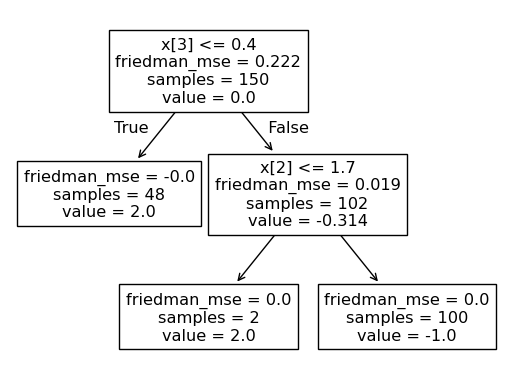

In [40]:
tree.plot_tree(GBSirus.estimators_[0,0])

[Text(0.5, 0.8333333333333334, 'x[2] <= 1.7\nfriedman_mse = 0.18\nsamples = 150\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[3] <= 0.4\nfriedman_mse = 0.0\nsamples = 48\nvalue = 0.599'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 46\nvalue = 1.656'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 2\nvalue = 1.809'),
 Text(0.75, 0.5, 'x[3] <= 0.4\nfriedman_mse = 0.016\nsamples = 102\nvalue = -0.282'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.656'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 100\nvalue = -0.952')]

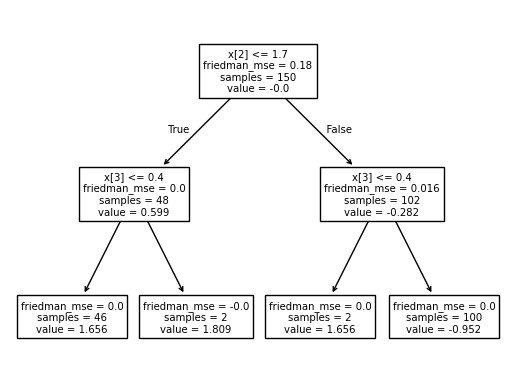

In [41]:
tree.plot_tree(GBSirus.estimators_[1,0])

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.4\nfriedman_mse = 0.144\nsamples = 150\nvalue = -0.001'),
 Text(0.25, 0.5, 'x[2] <= 1.7\nfriedman_mse = 0.0\nsamples = 48\nvalue = 0.535'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 46\nvalue = 1.43'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 2\nvalue = 1.533'),
 Text(0.75, 0.5, 'x[2] <= 1.7\nfriedman_mse = 0.013\nsamples = 102\nvalue = -0.253'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.53'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 100\nvalue = -0.913')]

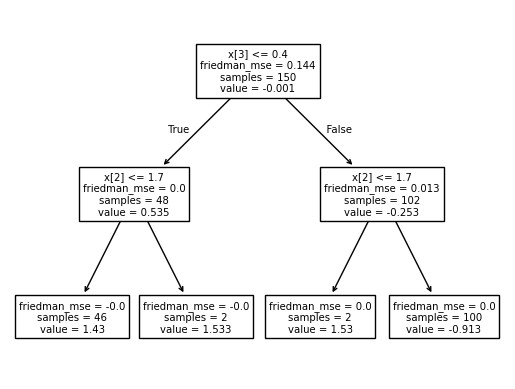

In [42]:
tree.plot_tree(GBSirus.estimators_[2,0])

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.4\nfriedman_mse = 0.116\nsamples = 150\nvalue = -0.002'),
 Text(0.25, 0.5, 'x[2] <= 1.7\nfriedman_mse = 0.0\nsamples = 48\nvalue = 0.478'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 46\nvalue = 1.272'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.431'),
 Text(0.75, 0.5, 'x[2] <= 1.7\nfriedman_mse = 0.011\nsamples = 102\nvalue = -0.227'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.342'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 100\nvalue = -0.88')]

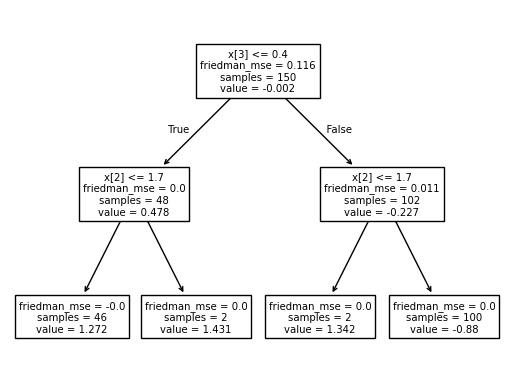

In [43]:
tree.plot_tree(GBSirus.estimators_[3,0])

In [ ]:
tree.plot_tree(GBSirus.estimators_[4,0])

In [ ]:
tree.plot_tree(GBSirus.estimators_[99,0])